# 1. The Capital Asset Pricing Model (CAPM):
is a foundational concept in finance that describes the relationship between the expected return of an investment and its risk relative to the market.

It helps investors answer the question: “How much return should I expect from an asset, given the risk I’m taking compared to the overall market?”

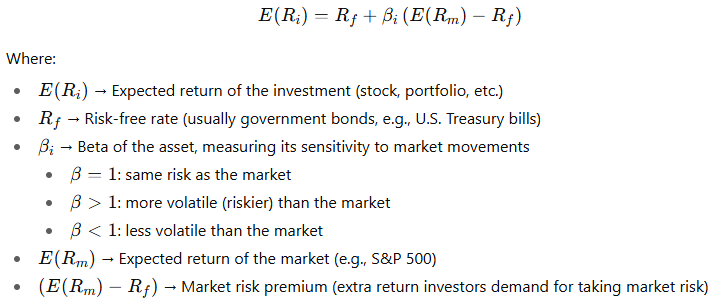

## Uses of CAPM

1. Valuing stocks and portfolios

2. Estimating cost of equity in corporate finance (WACC calculation)

3. Comparing investment opportunities

4. Determining required return given ris

* **Risk-free return**: You could always earn this much without risk.

* **Risk premium**: Extra return for taking risk above the risk-free.

* **Beta scaling**: The more sensitive your asset is to the market, the more risk premium it earns.

## **Risk-free asset**
is an investment that is assumed to carry no risk of financial loss — meaning you are guaranteed to get back both your principal and the promised return.


### Characteristics of a Risk-Free Asset

* No default risk → The issuer is virtually certain to repay (e.g., stable governments).

* No variability in returns → Returns are fixed and predictable.

* Highly liquid → Easy to buy and sell in the market.

### Examples

* Government Treasury Bills (T-Bills) (e.g., 3-month U.S. T-Bills) → the most common proxy in finance.

* Short-term government bonds from countries with very low default risk.

* Central bank deposits (in some cases).

## **The market portfolio**
is a theoretical portfolio that contains all investable assets in the world, each weighted according to its market value (capitalization).

That means:

    * Stocks, bonds, real estate, commodities, private companies, etc.

    * Each asset’s weight = its proportion of total global market value.

### In CAPM

1. The market portfolio represents the “benchmark” for risky investments.

2. CAPM assumes every investor holds some combination of:

    * The risk-free asset (e.g., T-bills)

    * The market portfolio

This leads to the Capital Market Line (CML):

* A straight line showing risk-return tradeoff between the risk-free asset and the market portfolio.

### Why is it important?

1. Expected return: In CAPM, the excess return of any asset depends on how correlated it is with the market portfolio (via Beta).

2. Diversification: The market portfolio is perfectly diversified. It eliminates all unsystematic (idiosyncratic) risk, leaving only systematic risk (market risk).

3. Benchmark: In practice, we can’t build the true market portfolio (we can’t invest in everything). Instead, we use broad indices like:

    * S&P 500 (U.S.)

    * MSCI World Index (global)

    * FTSE All-World Index

## **Beta (β)**
measures how sensitive an asset’s return is compared to the overall market’s return.

It answers:

“If the market moves by 1%, how much does this asset move on average?”

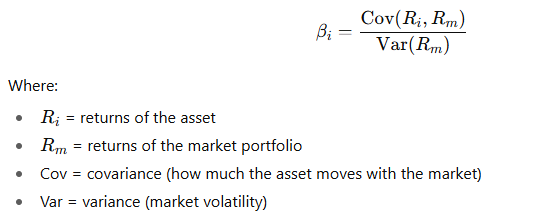

* β = 1 → The asset moves in line with the market.

    * Example: Market up 10% → Asset up ~10%.

* β > 1 → More volatile (riskier) than the market.

    * Example: β = 1.5 → Market up 10% → Asset up ~15% (and down more when the market falls).

* β < 1 → Less volatile (defensive asset).

    * Example: β = 0.7 → Market up 10% → Asset up ~7%.

* β = 0 → No correlation with the market (e.g., Treasury bills).

* β < 0 → Moves opposite the market (rare, e.g., gold sometimes).

### Why Beta matters

1. In CAPM, beta determines the risk premium an investor should get.

2. Higher beta → higher expected return (to compensate for higher market risk).

3. It’s used to estimate cost of equity in corporate finance.

#2. IMPORT DATASETS AND LIBRARIES

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px             # for interactive, dynamic plots
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [3]:
# AAPL = Apple Stock
# BA = Boeing
# T = AT&T
# MGM = MGM Resorts International (Hotel Industry)
# AMZN = Amazon
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google
# sp500 = US Stock Market (S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on U.S. stock exchange)
# Check the list of S&P 500 companies here: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

stocks_df = pd.read_csv('/content/drive/MyDrive/stock.csv')
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [4]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


#3. PERFORM EXPLORATORY DATA ANALYSIS AND BASIC VISUALIZATION

In [5]:
# Check if data contains any null values
stocks_df.isnull().sum()

,0
Date,0
AAPL,0
BA,0
T,0
MGM,0
AMZN,0
IBM,0
TSLA,0
GOOG,0
sp500,0


In [6]:
# Getting dataframe info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [7]:
def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

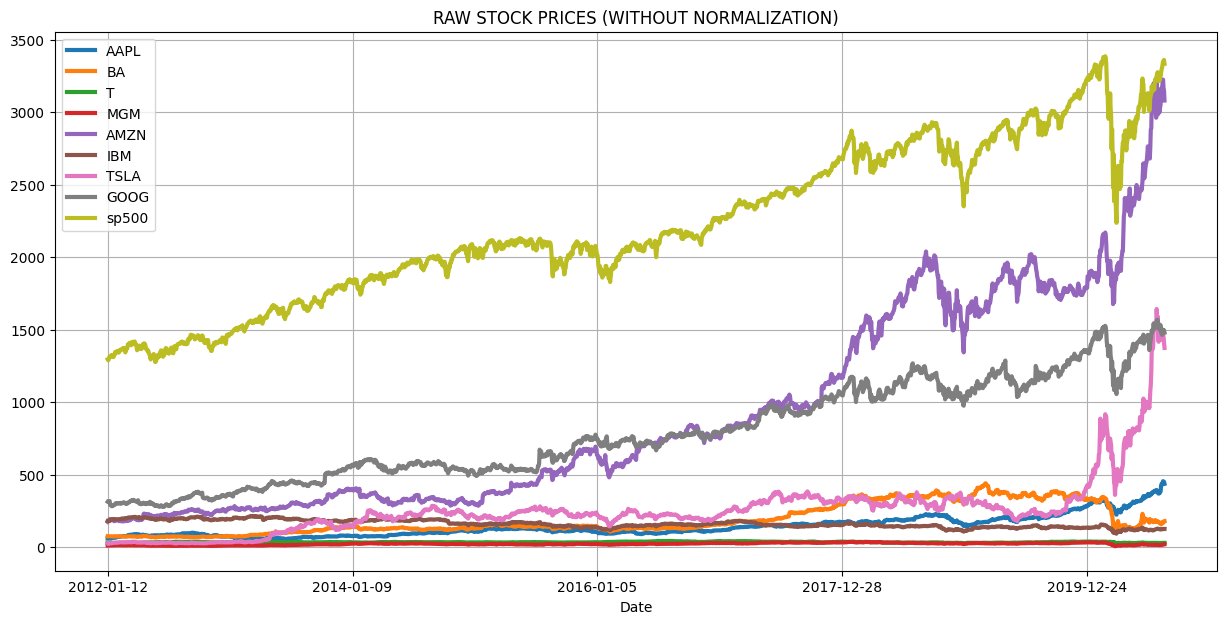

In [8]:
# Plot the data
show_plot(stocks_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

Plot the normalized data:

* To visualize real dollar trends (raw data).
* Then to compare performance fairly across stocks (normalized data).

In [9]:
def normalize(df):
  x = df.copy()

  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

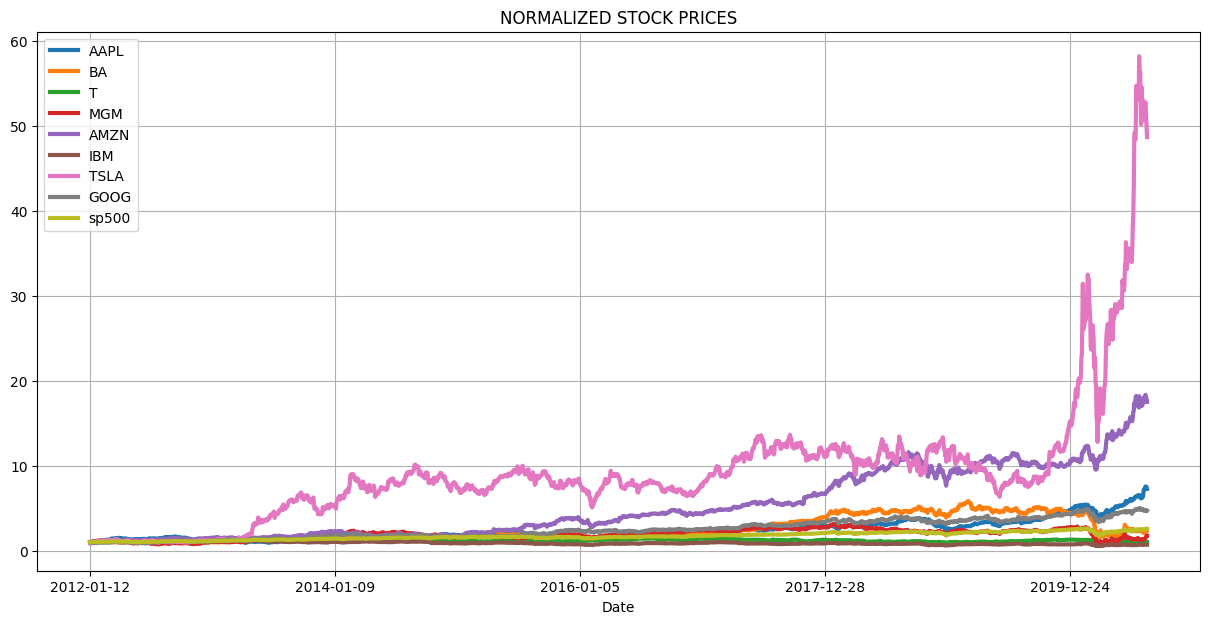

In [10]:
# Plot the normalized data
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

In [11]:
def interactive_plot(df, title):
  fig = px.line(title = title)

  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i) # add a new Scatter trace

  fig.show()

In [12]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

In [13]:
# Plot interactive chart
interactive_plot(normalize(stocks_df), 'Prices')

#4. CALCULATE DAILY RETURNS

In [14]:
# Function to calculate the daily returns
def daily_return(df):

  df_daily_return = df.copy()

  # Loop through each stock
  for i in df.columns[1:]:

    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100

    # set the value of first row to zero, as previous value is not available
    df_daily_return[i][0] = 0
  return df_daily_return

In [15]:
# Get the daily returns
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return

Streaming output truncated to the last 5000 lines.

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/tmp/ipython-input-2621909136.py:13: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignme

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


#5. CALTA FOR A SINGLE STOCULATE BECK

In [16]:
# Select any stock, let's say Apple
stocks_daily_return['AAPL']

,AAPL
0,0.000000
1,-0.374946
2,1.164812
3,1.038382
4,-0.316937
...,...
2154,0.362467
2155,3.488923
2156,-2.449458
2157,1.453480


In [17]:
# Select the S&P500 (Market)
stocks_daily_return['sp500']

,sp500
0,0.000000
1,-0.494792
2,0.355295
3,1.110793
4,0.493866
...,...
2154,0.642974
2155,0.642770
2156,0.063303
2157,0.274222


<Axes: xlabel='sp500', ylabel='AAPL'>

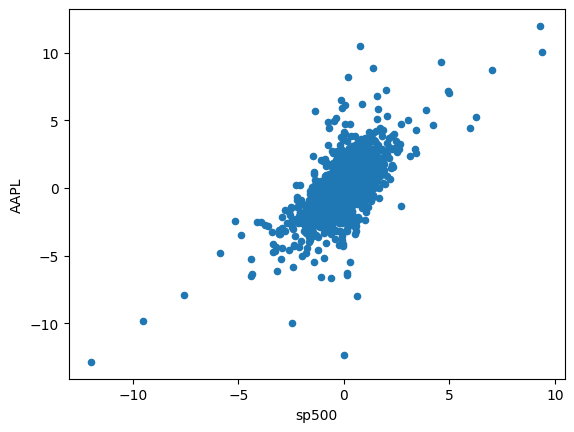

In [18]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

In [19]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return).
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500)
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market.
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market.
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!


beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('AAPL', beta, alpha))

Beta for AAPL stock is = 1.1128924148678097 and alpha is = 0.052812084694402905


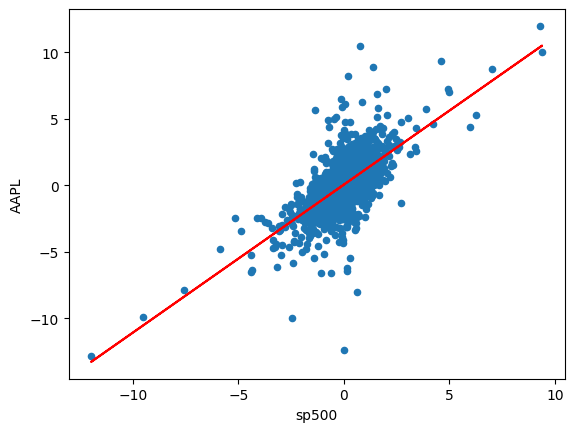

In [20]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

# Straight line equation with alpha and beta parameters
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')

#6. APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK

In [21]:
beta

np.float64(1.1128924148678097)

In [22]:
# Let's calculate the average daily rate of return for S&P500
stocks_daily_return['sp500'].mean()

np.float64(0.04931600660038911)

In [23]:
# Let's calculate the annualized rate of return for S&P500
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday)
# Check your answers with: https://dqydj.com/sp-500-return-calculator/
rm = stocks_daily_return['sp500'].mean() * 252
rm

np.float64(12.427633663298055)

In [24]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0

# Calculate return for any security (APPL) using CAPM
ER_AAPL = rf + ( beta * (rm-rf) )

In [25]:
ER_AAPL

np.float64(13.830619238640256)

#7. CALCULATE BETA FOR ALL STOCKS

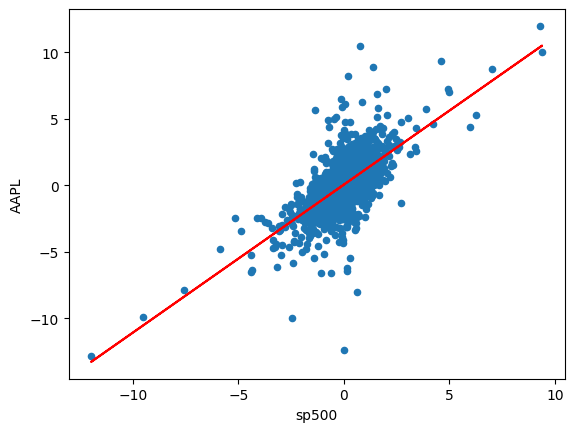

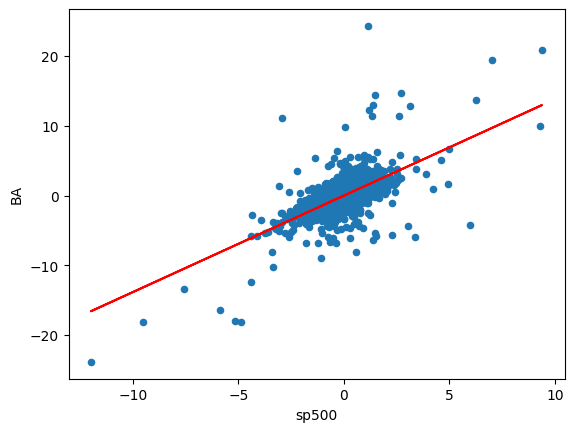

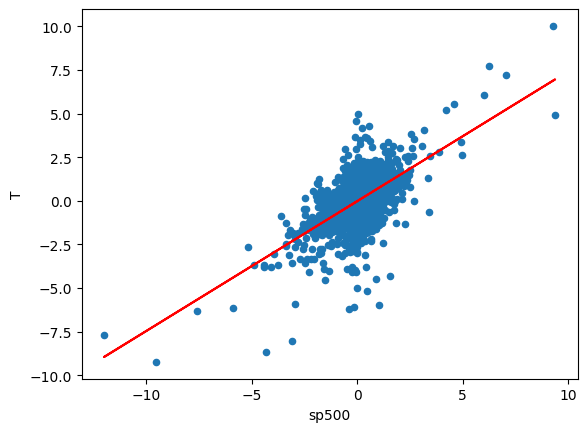

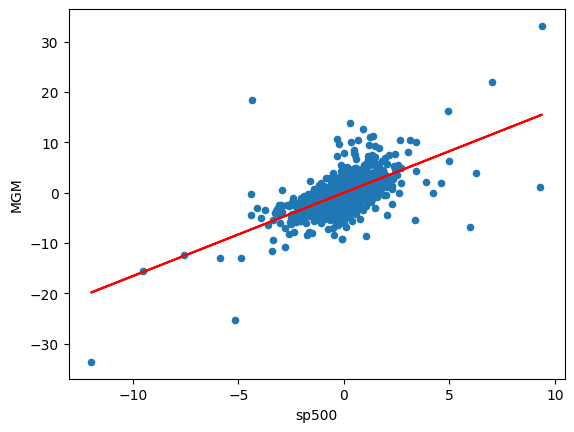

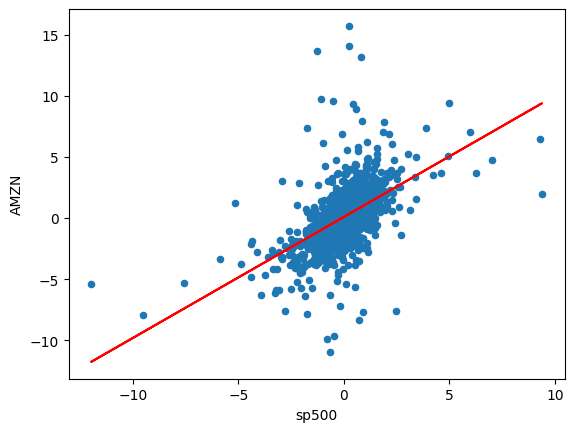

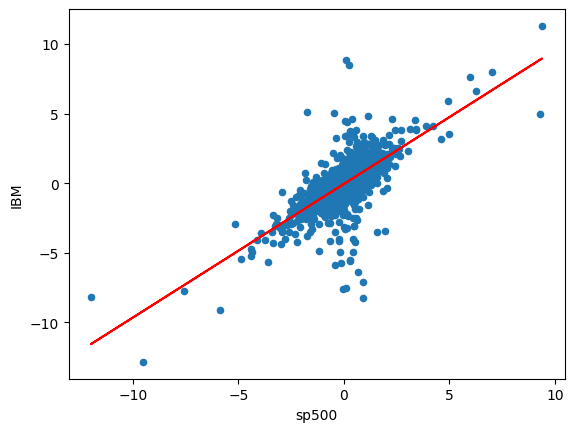

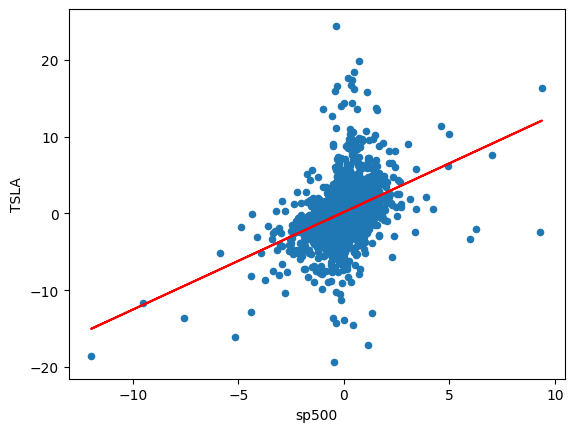

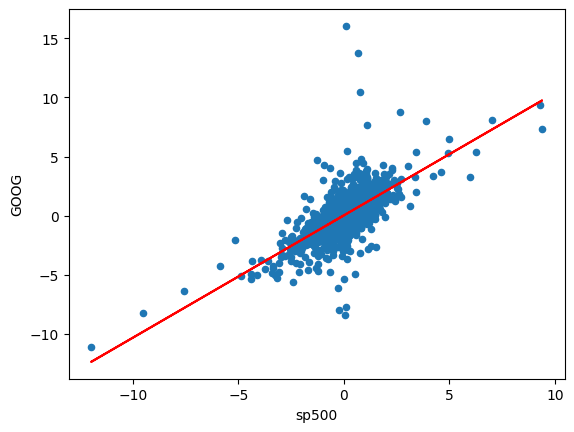

In [26]:
# Let's create a placeholder for all betas and alphas (empty dictionaries)
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stocks_daily_return.columns:

  # Ignoring the date and S&P500 Columns
  if i != 'Date' and i != 'sp500':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i)

    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)

    plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')

    beta[i] = b

    alpha[i] = a

    plt.show()

In [27]:
# Let's view Beta for every stock
beta

{'AAPL': np.float64(1.1128924148678097),
 'BA': np.float64(1.3828672010892775),
 'T': np.float64(0.7446293454747844),
 'MGM': np.float64(1.653567706518011),
 'AMZN': np.float64(0.9917345712576846),
 'IBM': np.float64(0.9604149148095246),
 'TSLA': np.float64(1.2686150101095903),
 'GOOG': np.float64(1.0348817687428562)}

In [28]:
# Let's view alpha for each of the stocks
# Alpha describes the strategy's ability to beat the market (S&P500)
# Alpha indicates the “excess return” or “abnormal rate of return,”
# A positive 0.175 alpha for Tesla means that the portfolio’s return exceeded the benchmark S&P500 index by 17%.

alpha

{'AAPL': np.float64(0.052812084694402905),
 'BA': np.float64(-0.0022906983297531543),
 'T': np.float64(-0.028563430198461616),
 'MGM': np.float64(-0.016885305520478674),
 'AMZN': np.float64(0.1022139641776522),
 'IBM': np.float64(-0.05345494150445116),
 'TSLA': np.float64(0.17583492165165812),
 'GOOG': np.float64(0.03335558721467016)}

#8. APPLY CAPM FORMULA TO CALCULATE THE RETURN FOR THE PORTFOLIO

In [29]:
# Obtain a list of all stock names
keys = list(beta.keys())
keys

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

In [30]:
# Define the expected return dictionary
ER = {}

rf = 0 # assume risk free rate is zero in this case
rm = stocks_daily_return['sp500'].mean() * 252 # this is the expected return of the market
rm

np.float64(12.427633663298055)

In [31]:
for i in keys:
  # Calculate return for every security using CAPM
  ER[i] = rf + ( beta[i] * (rm-rf) )

In [32]:
for i in keys:
  print('Expected Return Based on CAPM for {} is {}%'.format(i, ER[i]))

Expected Return Based on CAPM for AAPL is 13.830619238640256%
Expected Return Based on CAPM for BA is 17.185766980127866%
Expected Return Based on CAPM for T is 9.253980720502028%
Expected Return Based on CAPM for MGM is 20.549933694065793%
Expected Return Based on CAPM for AMZN is 12.324913942818466%
Expected Return Based on CAPM for IBM is 11.935684726020382%
Expected Return Based on CAPM for TSLA is 15.765882605403148%
Expected Return Based on CAPM for GOOG is 12.861131506762153%


In [33]:
# Assume equal weights in the portfolio
portfolio_weights = 1/8 * np.ones(8)
portfolio_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [34]:
# Calculate the portfolio return
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
ER_portfolio

np.float64(14.21348917679251)

In [35]:
print('Expected Return Based on CAPM for the portfolio is {}%\n'.format(ER_portfolio))

Expected Return Based on CAPM for the portfolio is 14.21348917679251%

